# Poisson Equation in 2D - Part A version 2

In [1]:
import gc
import jax
import anon
import anabel
import anabel.backend as anp
from interpolate import lagrange_t6
# anon.conf.config.update('jax_disable_jit', True)
anon.conf.config.update("jax_enable_x64", True)
from poisson import poisson2 as poisson

In [2]:
import anon.diff as diff
from anabel.template import template

Source term, $f$:

In [3]:
f=lambda x: 4.0

The analytic solution, $u$:

In [4]:
u = lambda x: 1-x[0]**2 - x[1]**2

In [5]:
# model =  anabel.MeshGroup.read("circle_iso/mesh1", "m228", cell="triangle6")
# points = model.param("points")
# weights = model.param("weights")
# elem = poisson(*[lagrange_t6()]*3,f=f,points=points,weights=weights)

In [6]:
# U = model.compose(elem=elem,solver="cg")
# I = model.assemble_integral(elem=elem)
# quad = anon.quad.simplex.Simplex.load("gauss02.m")

In [7]:
# with jax.disable_jit():
#     print(I(anp.arange(model.nf)[:,None], points=quad.points, weights=quad.weights))

In [8]:
# with jax.disable_jit():
#     U_h = U(quad.points, quad.weights)

In [9]:
# model.plot(U_h,render_points_as_spheres=True)

m: 1
Model built with 37 dofs and 61 elements
	m: 1, g: 2
	loaded quadrature
source vector assembled
	State determination complete
	Matrix assembly complete
stiffness matrix assembled
	execution complete


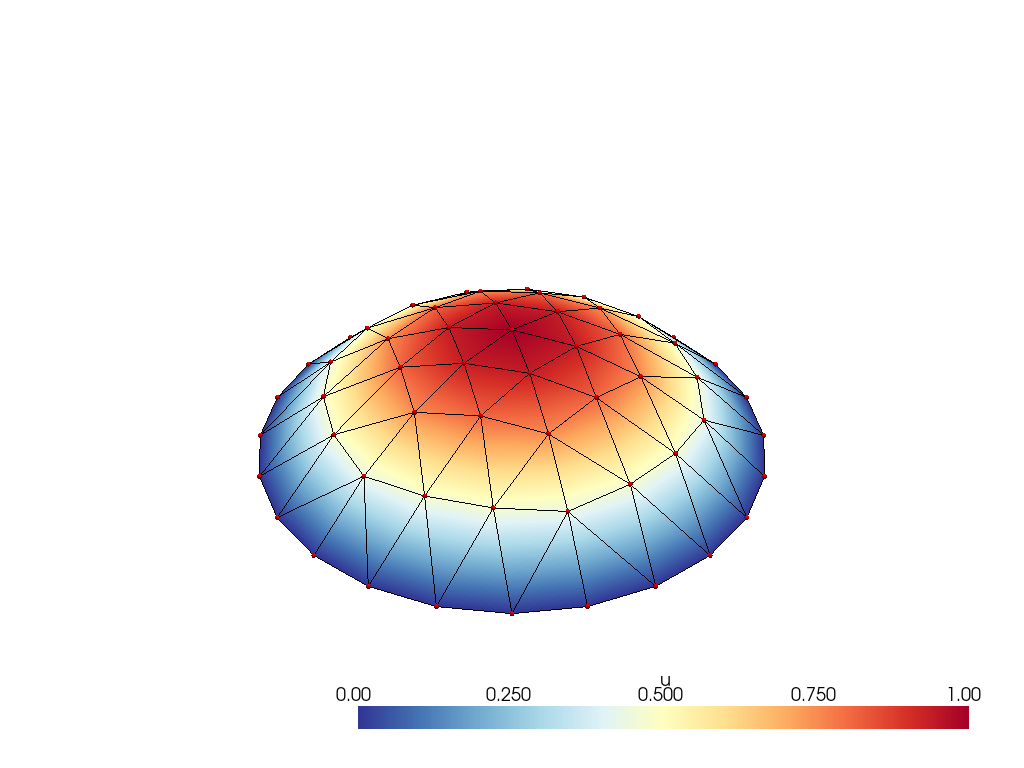

	m: 1, g: 5
	loaded quadrature
source vector assembled
	State determination complete
	Matrix assembly complete
stiffness matrix assembled
	execution complete


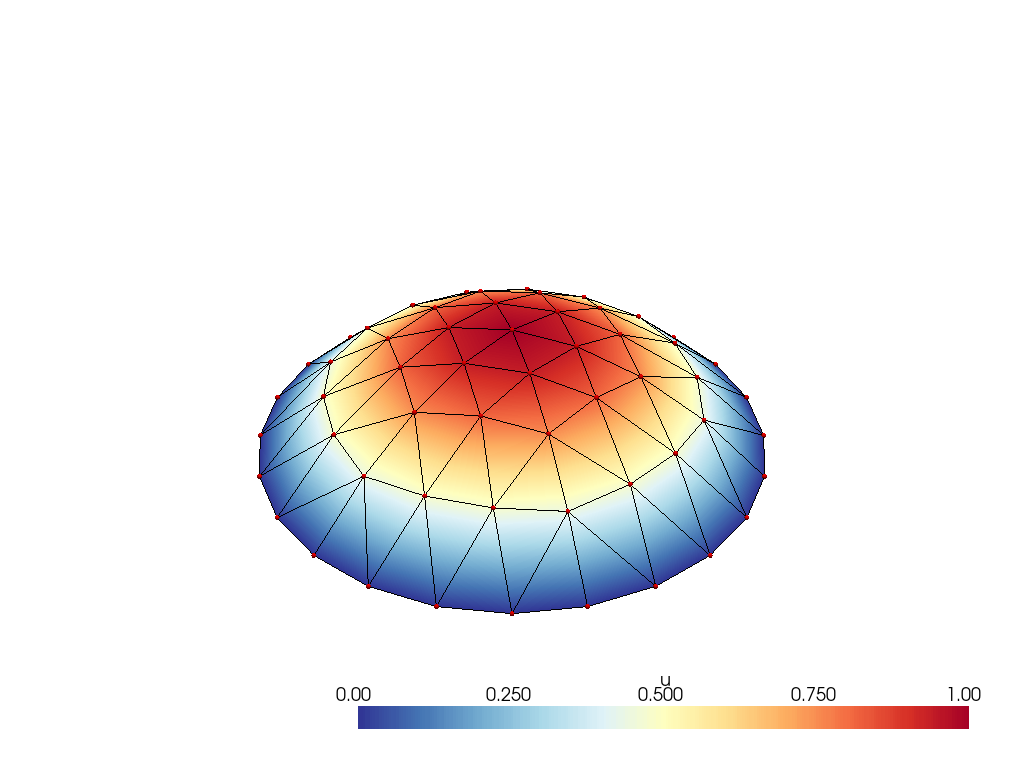

	m: 1, g: 8
	loaded quadrature
source vector assembled
	State determination complete
	Matrix assembly complete
stiffness matrix assembled
	execution complete


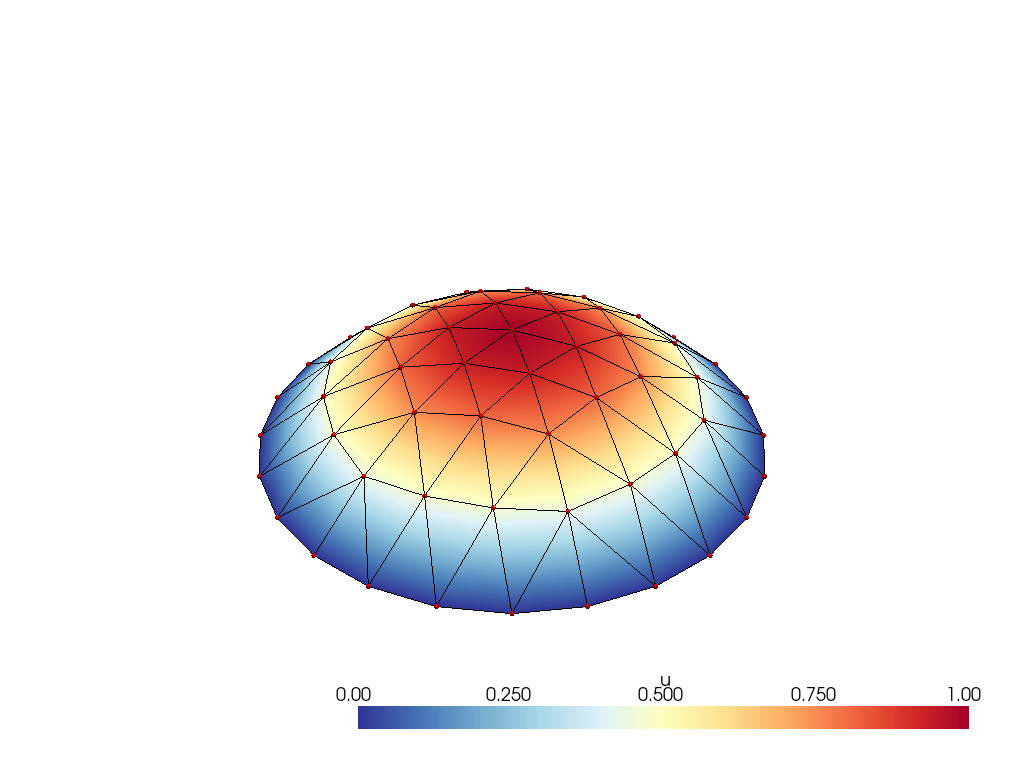

	m: 1, g: 13
	loaded quadrature
source vector assembled
	State determination complete
	Matrix assembly complete
stiffness matrix assembled
	execution complete


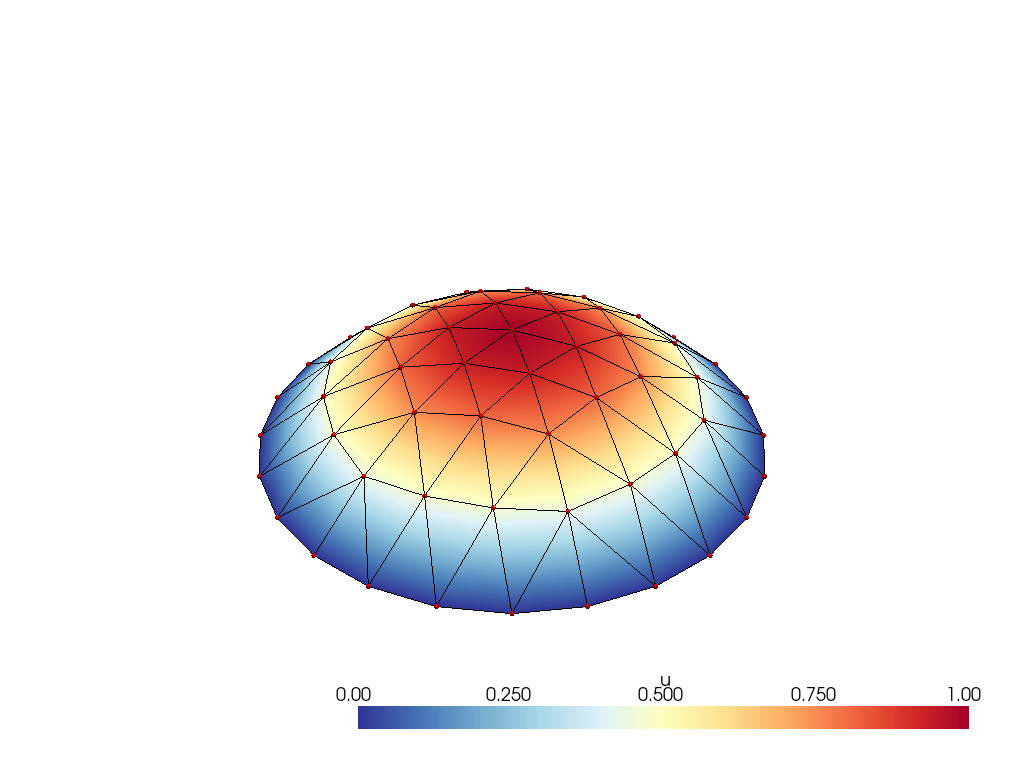

	m: 1, g: 19
	loaded quadrature
source vector assembled
	State determination complete
	Matrix assembly complete
stiffness matrix assembled
	execution complete


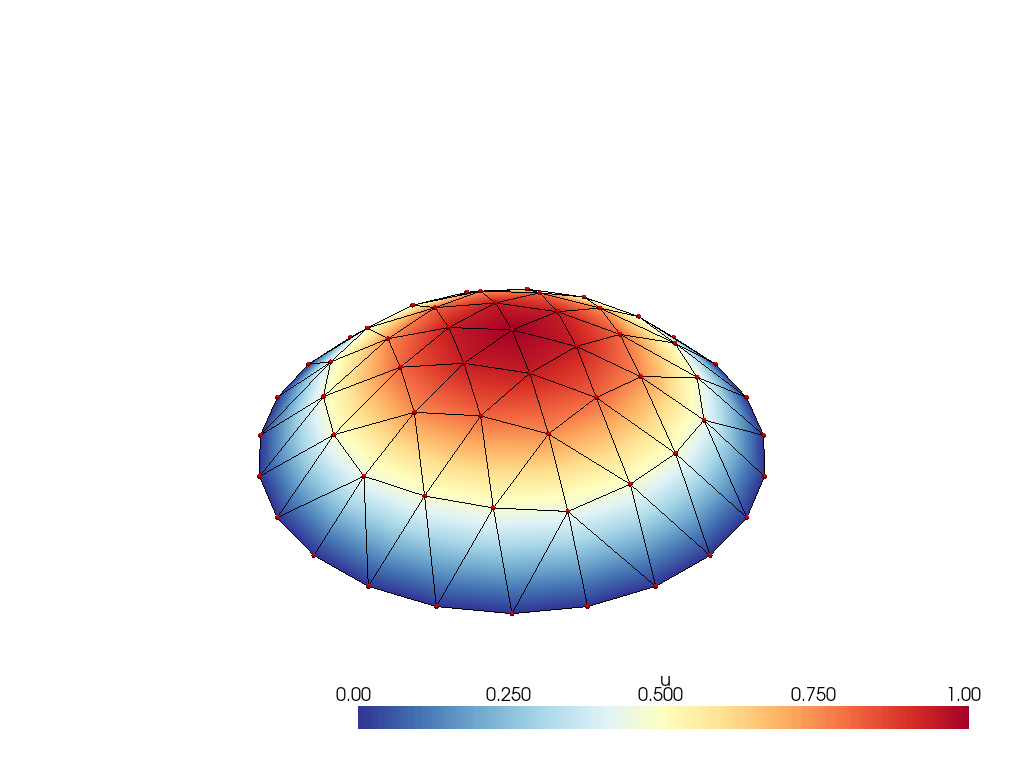

m: 2
Model built with 170 dofs and 220 elements
	m: 2, g: 2
	loaded quadrature
source vector assembled
	State determination complete


KeyboardInterrupt: 

In [10]:
for m in [1,2,3,4,5]: #4,5]:
    print(f"m: {m}")
    from jax.interpreters import xla
    xla._xla_callable.cache_clear()

    model =  anabel.MeshGroup.read(f"circle_iso/mesh{m}", "m228", cell="triangle6")
    xi = model.param("xi")
    elem = poisson(*[lagrange_t6()]*3, f=f, quad_point=xi)

    U = model.compose(elem=elem, solver="sparse", verbose=True)
    print(f"Model built with {model.nf} dofs and {model.ne} elements")
    for g in [2,5,8,13,19]:
        print(f"\tm: {m}, g: {g}")
        quad = anon.quad.simplex.Simplex.load(f"gauss{g:02}.m")
        print("\tloaded quadrature")
        U_h = U(quad.points, quad.weights)
        print("\texecution complete")
        anp.savez(f"./mesh{m}-gauss{g:02}.npz",U_h)
        model.plot(U_h,savefig=f"../img/mesh{m}-gauss{g:02}.png")
    del U
    del U_h
    del model
    gc.collect()

In [ ]:
model.plot(func=u)

## Error Analysis

In [ ]:
@template(1)
def H1(transf,test,trial,u,quad_point=None, thickness=1.0):
    state = None
    det = anp.linalg.det
    slv = anp.linalg.solve
    du = diff.jacfwd(u)
    jacn_test = diff.jacx(test)
    jacn_trial = diff.jacx(trial)
    
    def transf(xi, xyz):
        return test(xi)@xyz
    def jacn_transf(xi,xyz): return jacn_test(xi)@xyz
    
    jacx_test = lambda xi,xyz: slv(jacn_transf(xi,xyz), jacn_test(xi))
    dvol = lambda xi, xyz: 0.5*thickness*abs(det(jacn_transf(xi,xyz)))
    
    def main(U,__,___,xyz=None,xi=quad_point):
        q = (du(transf(xi,xyz)) - jacx_test(xi,xyz)@U)**2 * dvol(xi,xyz)
        return _,q,___
    return locals()

In [ ]:
model.assemble_integral(elem=H1(*[lagrange_t6()]*3,u=u))(U_h,points=quad.points,weights=quad.weights)

In [ ]:
quad.points

In [ ]:
import anabel.backend as anp

In [ ]:
idx = [(i,j,k) for i in range(2) for j in range(3) for k in range(4)]

In [ ]:
idx

In [ ]:
a[tuple(zip(*idx))]

In [ ]:
tuple(zip(*idx))